## DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#read csv
df = pd.read_csv('csv_result-Ovarian.csv')

#display row of data frame
df.head()

,id,MZ-7.86E-05,MZ2.18E-07,MZ9.60E-05,MZ0.000366014,MZ0.000810195,MZ0.001428564,MZ0.002221123,MZ0.003187869,MZ0.004328805,...,MZ19974.404,MZ19977.042,MZ19979.68,MZ19982.319,MZ19984.957,MZ19987.596,MZ19990.235,MZ19992.874,MZ19995.513,Class
0,1,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,Normal
1,2,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,Normal
2,3,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,Normal
3,4,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,Normal
4,5,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,Normal


In [ ]:
#data exploration
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 15156 entries, id to Class
dtypes: float64(15151), int64(4), object(1)
memory usage: 29.3+ MB


,id,MZ-7.86E-05,MZ2.18E-07,MZ9.60E-05,MZ0.000366014,MZ0.000810195,MZ0.001428564,MZ0.002221123,MZ0.003187869,MZ0.004328805,...,MZ19971.766,MZ19974.404,MZ19977.042,MZ19979.68,MZ19982.319,MZ19984.957,MZ19987.596,MZ19990.235,MZ19992.874,MZ19995.513
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,127.000000,0.532450,0.462623,0.465859,0.421363,0.481133,0.489570,0.466263,0.512587,0.531018,...,0.435985,0.443944,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548,0.430548
std,73.179004,0.183136,0.196834,0.196418,0.212991,0.196406,0.185289,0.173548,0.214232,0.215837,...,0.160151,0.156482,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192,0.155192
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,0.397850,0.329667,0.321841,0.255817,0.345240,0.354432,0.345240,0.342109,0.362316,...,0.324327,0.334049,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282,0.330282
50%,127.000000,0.537636,0.461537,0.459768,0.430235,0.476194,0.468359,0.464290,0.500000,0.536231,...,0.441929,0.451566,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102,0.433102
75%,190.000000,0.655912,0.593407,0.597701,0.569765,0.619047,0.620253,0.595238,0.684212,0.710146,...,0.544194,0.547010,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554,0.541554
max,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df_cleaned = df.dropna()

In [ ]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Display duplicate rows, if any
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [id, MZ-7.86E-05, MZ2.18E-07, MZ9.60E-05, MZ0.000366014, MZ0.000810195, MZ0.001428564, MZ0.002221123, MZ0.003187869, MZ0.004328805, MZ0.005643929, MZ0.007133241, MZ0.008796743, MZ0.010634432, MZ0.012646311, MZ0.014832378, MZ0.017192634, MZ0.019727078, MZ0.022435711, MZ0.025318532, MZ0.028375542, MZ0.031606741, MZ0.035012128, MZ0.038591704, MZ0.042345469, MZ0.046273422, MZ0.050375564, MZ0.054651894, MZ0.059102413, MZ0.063727121, MZ0.068526017, MZ0.073499102, MZ0.078646375, MZ0.083967837, MZ0.089463488, MZ0.095133327, MZ0.10097736, MZ0.10699557, MZ0.11318798, MZ0.11955457, MZ0.12609535, MZ0.13281032, MZ0.13969948, MZ0.14676283, MZ0.15400037, MZ0.16141209, MZ0.16899801, MZ0.17675811, MZ0.1846924, MZ0.19280088, MZ0.20108355, MZ0.20954041, MZ0.21817145, MZ0.22697669, MZ0.23595611, MZ0.24510972, MZ0.25443752, MZ0.26393951, MZ0.27361569, MZ0.28346605, MZ0.29349061, MZ0.30368935, MZ0.31406228, MZ0.3246094, MZ0.33533071, MZ0.34622

In [ ]:
# Encode categorical columns (if any)
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col.astype(str)))

# Display the DataFrame after encoding categorical columns
numerical_columns_to_normalize = df.columns[1:-1]

# Check and handle non-numeric values
df[numerical_columns_to_normalize] = df[numerical_columns_to_normalize].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Normalize numerical using Min-Max scaling
scaler = MinMaxScaler()
df[numerical_columns_to_normalize] = scaler.fit_transform(df[numerical_columns_to_normalize])

In [ ]:
# Exclude 'id'
if 'id' in df.columns:
    columns_to_exclude = ['id']
    data = df.drop(columns=columns_to_exclude, errors='ignore')

# Assuming the target column is the last column, separate features and target
X = data.iloc[:, :-1]  # Features (all columns kecuali last)
y = data.iloc[:, -1]  # Target variable (last column)

NameError: name 'df' is not defined

### CHI-SQUARE

In [ ]:
# Chi-square feature selection
k_best = SelectKBest(chi2, k=5)
X_selected = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = k_best.get_support()

# Get the original column names of all features
all_feature_names = np.array(X.columns)

# Get the original column names of the selected features
selected_feature_names = all_feature_names[selected_feature_indices]

# Create a DataFrame using the reference column names and the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

NameError: name 'SelectKBest' is not defined

### RFE-SVM

In [ ]:
# SVM-RFE
svm_classifier = SVC(kernel='linear')
num_top_genes = 5  # Specify the number of top genes to display

# Store the column names before the transformation
column_names = X_train.columns

# SVM-RFE
rfe_svm = RFE(estimator=svm_classifier, n_features_to_select=num_top_genes)
X_train_svm_rfe = rfe_svm.fit_transform(X_train, y_train)

# Get the original column names of the selected features
selected_feature_names_svm = column_names[rfe_svm.support_]

# Convert selected features back to a DataFrame
selected_features_svm_df = pd.DataFrame(X_train_svm_rfe, columns=selected_feature_names_svm)

# Display the top genes contributing to classification for SVM-RFE
top_genes_svm = selected_features_svm_df.max().sort_values(ascending=False)
print(f"Top {num_top_genes} Genes for Classification (SVM-RFE):")
print(top_genes_svm)

Top 5 Genes for Classification (SVM-RFE):
MZ244.36855    1.0
MZ244.66041    1.0
MZ244.95245    1.0
MZ245.24466    1.0
MZ245.53704    1.0
dtype: float64


In [ ]:
# Perform cross-validation with SVM classifier after SVM-RFE
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracy_svm = cross_val_score(svm_classifier, X_train_svm_rfe, y_train, cv=stratified_kfold, scoring='accuracy')
cv_f1_svm = cross_val_score(svm_classifier, X_train_svm_rfe, y_train, cv=stratified_kfold, scoring='f1')

# Print average accuracy and F1 score after SVM-RFE and cross-validation
print(f"Average Accuracy after SVM-RFE with Cross-Validation: {cv_accuracy_svm.mean() * 100:.2f}%")
print(f"Average F1 Score after SVM-RFE with Cross-Validation: {cv_f1_svm.mean():.4f}")

Average Accuracy after SVM-RFE with Cross-Validation: 96.51%
Average F1 Score after SVM-RFE with Cross-Validation: 0.9517


### RANDOM FOREST - RFE

In [ ]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# RF-RFE
num_top_genes_rf = 5  # Specify the number of top genes to select for RF-RFE
rfe_rf = RFE(estimator=rf_classifier, n_features_to_select=num_top_genes_rf)
X_train_selected_rf = rfe_rf.fit_transform(X_train, y_train)

# Get the original column names of the selected features
selected_feature_names_rf = X_train.columns[rfe_rf.support_]

# Create a DataFrame using the reference column names and the selected features for RF-RFE
selected_features_df_rf = pd.DataFrame(X_train_selected_rf, columns=selected_feature_names_rf)

# Display the top genes contributing to classification for RF-RFE
top_genes_rf = selected_features_df_rf.max().sort_values(ascending=False)
print(f"Top {num_top_genes_rf} Genes for Classification (RF-RFE):")
print(top_genes_rf)

Top 5 Genes for Classification (RF-RFE):
MZ244.36855    1.0
MZ244.66041    1.0
MZ244.95245    1.0
MZ245.24466    1.0
MZ245.53704    1.0
dtype: float64


In [ ]:
# Perform cross-validation with Random Forest classifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracy_rf = cross_val_score(rf_classifier, X_train_selected_rf, y_train, cv=stratified_kfold, scoring='accuracy')
cv_f1_rf = cross_val_score(rf_classifier, X_train_selected_rf, y_train, cv=stratified_kfold, scoring='f1')

# Print average accuracy and F1 score after RF-RFE and cross-validation
print(f"Average Accuracy after RF-RFE with Cross-Validation: {cv_accuracy_rf.mean() * 100:.2f}%")
print(f"Average F1 Score after RF-RFE with Cross-Validation: {cv_f1_rf.mean():.4f}")

Average Accuracy after RF-RFE with Cross-Validation: 97.01%
Average F1 Score after RF-RFE with Cross-Validation: 0.9586


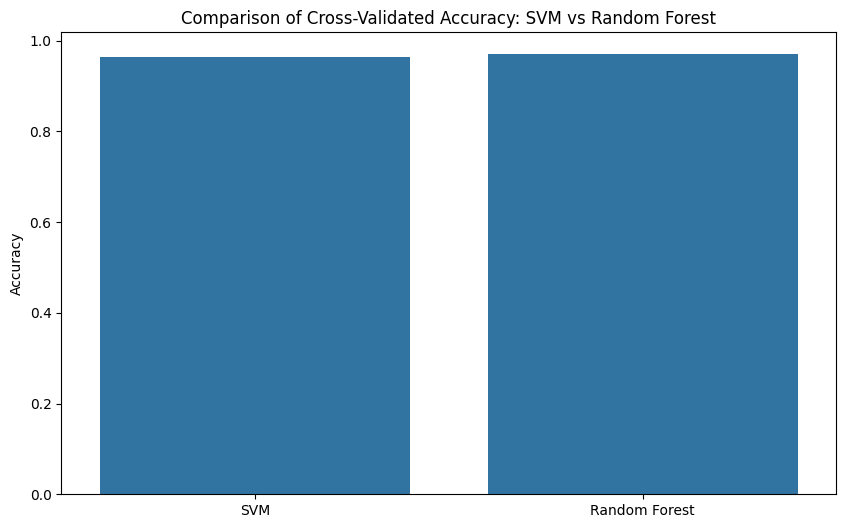

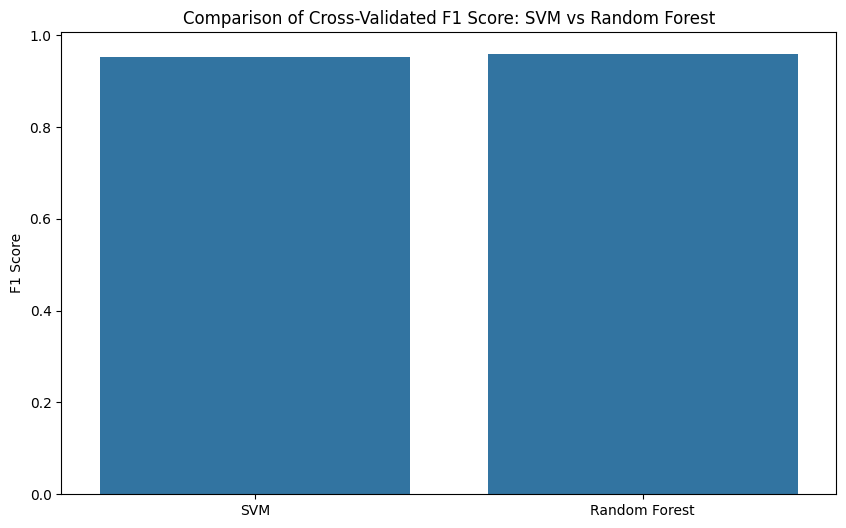

In [ ]:
# Set the y-axis scale to a smaller range
y_max = max(cv_accuracy_svm.mean(), cv_accuracy_rf.mean(), cv_f1_svm.mean(), cv_f1_rf.mean()) + 0.05

# Create a bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['SVM', 'Random Forest'], y=[cv_accuracy_svm.mean(), cv_accuracy_rf.mean()])
plt.title('Comparison of Cross-Validated Accuracy: SVM vs Random Forest')
plt.ylabel('Accuracy')
plt.show()

# Create a bar plot for F1 score comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['SVM', 'Random Forest'], y=[cv_f1_svm.mean(), cv_f1_rf.mean()])
plt.title('Comparison of Cross-Validated F1 Score: SVM vs Random Forest')
plt.ylabel('F1 Score')
plt.show()
